# E-Commerce Regression Project

## Introduction

For this project, we will figure out whether the company should focus on their mobile app or their website as a driver for revenue. Both areas of focus are avenues in which customers can order clothes. The goal of this project is to create a model that will predict which electronic platform generates the most revenue per unit. This data is from Kaggle.

Based on an initial look of the data during data collection, the following approaches will be used:

- Linear Regression
- Histogram
- Scatterplot
- lmplot

## Imports

We will begin by importing the necessary libraries.

In [139]:
# Import the libraries that will be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data


Time to pull in our data and take a closer look at it!

In [140]:
# Read the .csv into a dataframe and assign to variable called 'customers'
customers = pd.read_csv('Ecommerce Customers')

In [141]:
# Preview customers dataset
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [142]:
# View the data types and presence of missing values
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [143]:
# Look at the basic statistics for the dataset
customers.describe(include = 'all')

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500,500,500,500.000000,500.000000,500.000000,500.000000,500.000000
unique,500,500,138,NaN,NaN,NaN,NaN,NaN
top,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",SlateBlue,NaN,NaN,NaN,NaN,NaN
freq,1,1,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,33.053194,12.052488,37.060445,3.533462,499.314038
std,NaN,NaN,NaN,0.992563,0.994216,1.010489,0.999278,79.314782
min,NaN,NaN,NaN,29.532429,8.508152,33.913847,0.269901,256.670582
25%,NaN,NaN,NaN,32.341822,11.388153,36.349257,2.930450,445.038277
50%,NaN,NaN,NaN,33.082008,11.983231,37.069367,3.533975,498.887875
75%,NaN,NaN,NaN,33.711985,12.753850,37.716432,4.126502,549.313828


Based on the above tables, there are four variables (predictors) we can explore to see how they impact our **yearly amount spent** (outcome variable). The following variables are:

* **Avg. Session Length**: This is the average session of style advice sessions in the store.
* **Time on App**: This is the average time spent people spent using the company app (in minutes).
* **Time on Website**: This is the average time spent on the company website (in minutes).
* **Length of Membership**: This is how long the customer has been a member (in years). 

## Exploratory Data Analysis

To begin our EDA (Exploratory Data Analysis), we shall explore the data's numerical values.

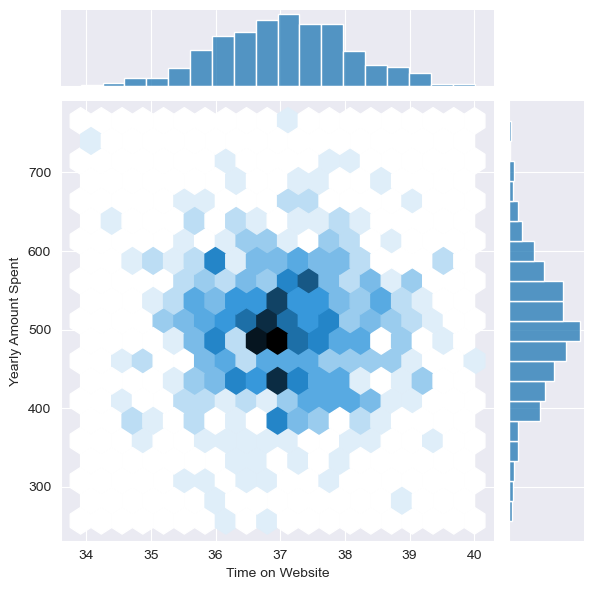

In [144]:
# Use a joinplot to visually see the distribution and relationship between 'time on website'
# and 'yearly amount spent'
sns.jointplot(data= customers, x= 'Time on Website', y= 'Yearly Amount Spent', kind= 'hex')

plt.show()

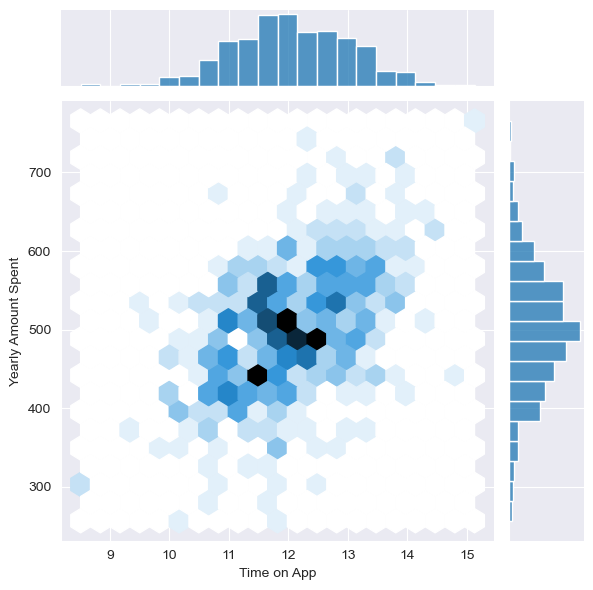

In [145]:
# Similar to the previous plot, visualize the distribution and relationship, but this time 
# between 'Time on app' and 'yearly amount spent'
sns.jointplot(data= customers, x='Time on App', y='Yearly Amount Spent', kind= 'hex')

plt.show()

From the above charts, it seems there is line shape in the second plot, suggesting a linear relationship may exist between **time on app** and **yearly amount spent**.

Now, we shall explore if there are any relationships across the dataset.

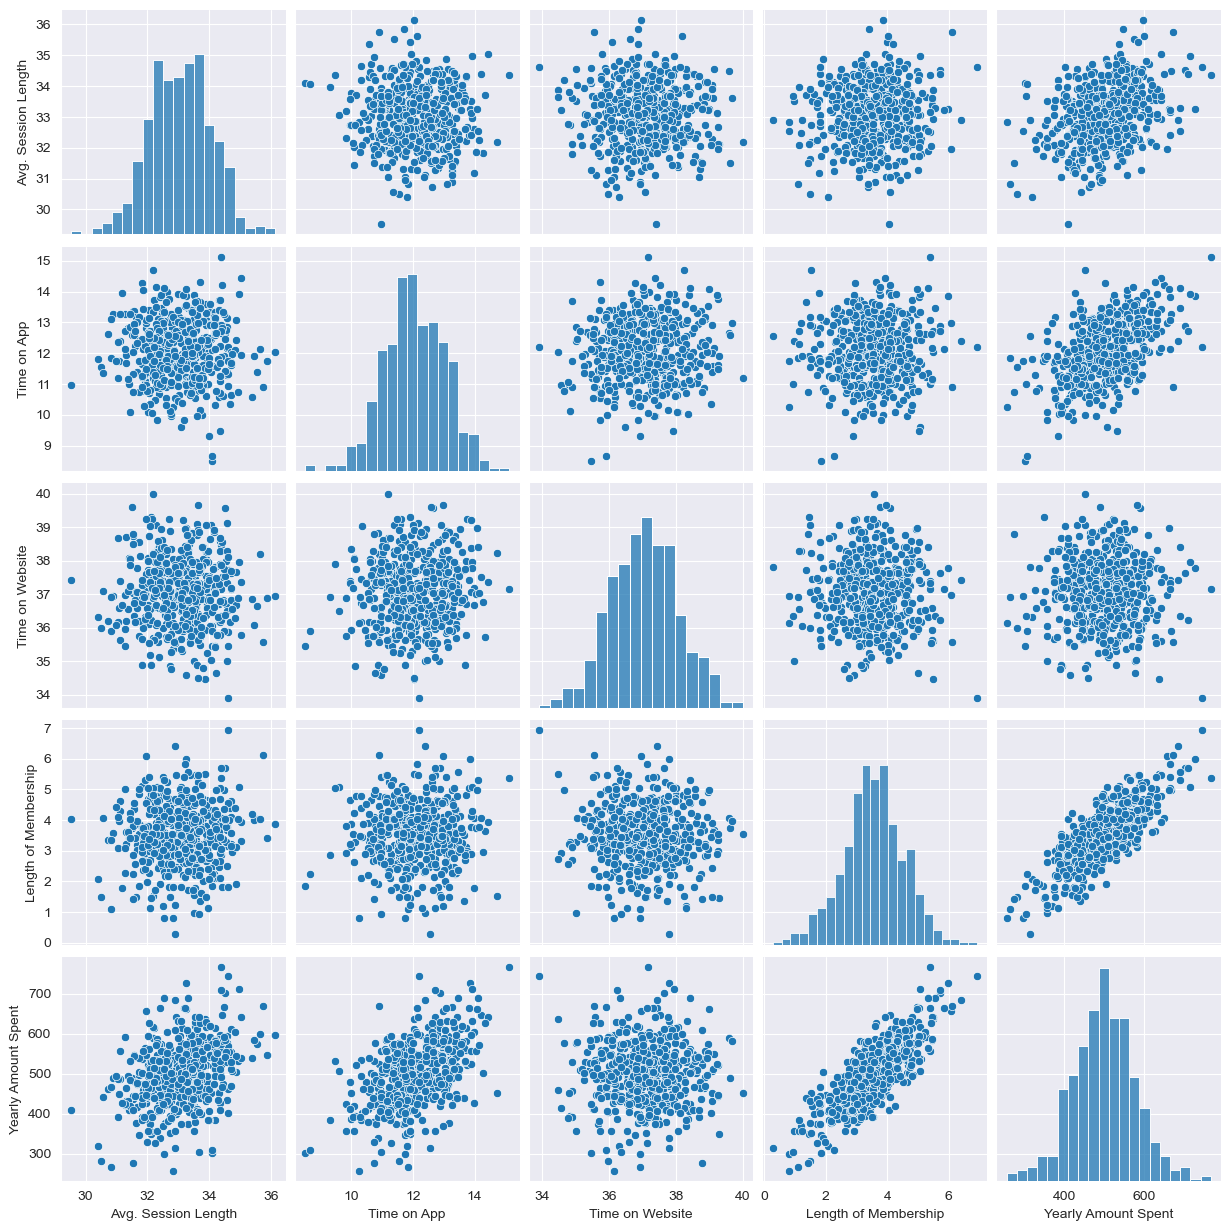

In [146]:
# Display potential correlations among each varaible
sns.pairplot(customers)

plt.show()

Based off this plot, it appears that the **yearly amount spent** variable is most correlated with the **length of the membership**. Let's get a better view of this relatioship.

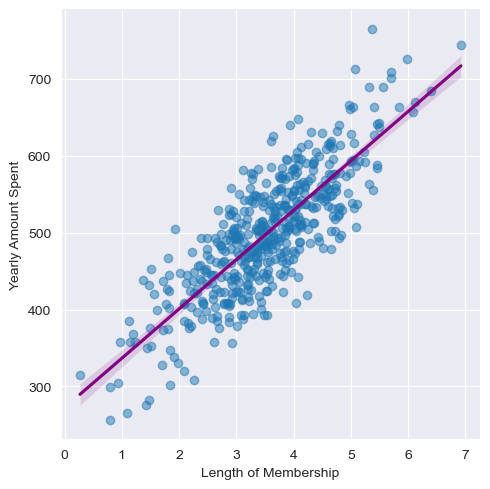

In [147]:
# Create a scatterplot that displays the linearity of the data points
sns.lmplot(data= customers, x= 'Length of Membership', y= 'Yearly Amount Spent',
          line_kws= {'color': 'purple'},
          scatter_kws= {'alpha': 0.5})

plt.show()

It seems there is a clear relationship between **length of membership** and **yearly amount spent**. This finding could be the case because customers who have longer memberships may have special perks awarded to them, which may generate more revenue. More data would be needed, such as membership status and rewards associated with that status, to explore this possibility.

However, since our objective is to compare platforms by revenue generated, we shall move forward and construct our regression model.

With the data explored some, we can split the data into training and testing sets.

## Training and Testing Data

In [148]:
# Retrieve module to split the dataset
from sklearn.model_selection import train_test_split

In [149]:
# We'll train our model on four predictor variables
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [150]:
# Assign out outcome variable
y = customers['Yearly Amount Spent']

Now to split data into training and test data.

In [151]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Let's train the model on our training data.

In [152]:
# Import the linear regression model and appropriate liraries
import statsmodels.api as sms
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

In [153]:
# Instantiate of the LinearRegression
lm = LinearRegression()

In [154]:
# Train/fit the linear regression on our traing data.
lm.fit(X_train, y_train)

LinearRegression()

What is the coefficient of our four variables?

In [155]:
print('Avg. Session Length coefficient:', round(lm.coef_[0],2))
print('')
print('Time on App coefficient:', round(lm.coef_[1], 2))
print('')
print('Time on Website coefficient:', round(lm.coef_[2], 2))
print('')
print('Length of Membership coefficient:', round(lm.coef_[3], 2))

Avg. Session Length coefficient: 25.98

Time on App coefficient: 38.59

Time on Website coefficient: 0.19

Length of Membership coefficient: 61.28


Based on our model, **time on app** and **length of membership** have the good associations with **yearly amount spent**, with **length of membership** being the stringest as indicated earlier. What this result means is that for every one minute spent on the app will generate $38.59 in revenue.

## Predicting Test Data

With the data fit to our model, we can see how our model performs by predicting off of the test values.

In [156]:
# Assigh our test data predictions to the 'prediction' variable
prediction = lm.predict(X_test)

In [157]:
prediction

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

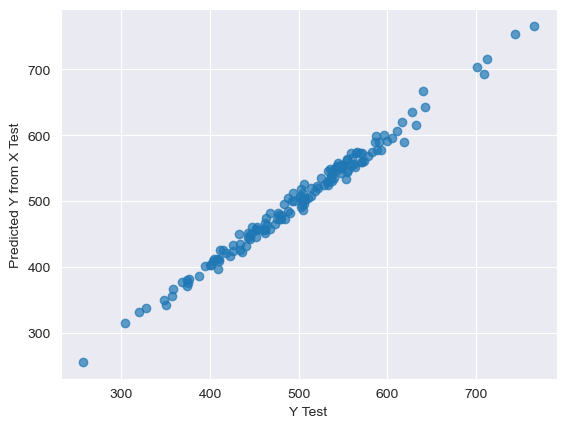

In [158]:
# Show a scatterplot of our regression to see how well our predictions compare
sns.set_style('darkgrid')

# Create scatterplot
plt.scatter(y_test, prediction, alpha= 0.7)

# Set x label
plt.xlabel('Y Test')

# Set y label
plt.ylabel('Predicted Y from X Test')

# Display plot
plt.show()

## Evaluating the Model

Now, let's evaluate our model's performance using the residual sum of squares and the explained variance score (R^2). We will calculate the following:

- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RSME)

In [160]:
from sklearn import metrics

In [161]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, prediction)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, prediction)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, prediction))))

MAE: 7.22814865343085
MSE: 79.81305165097484
RMSE: 8.933815066978656


In [162]:
# Explained variance score (R^2) - how much variance does the model explain?
print('R-squared:', metrics.explained_variance_score(y_test, prediction))

R-squared: 0.9890771231889606


## Assumptions

Since we have seen linear shape in our data with **time to app** and **length of membership** to **yearly amount spent** in the earlier pairplot, the linearity assumption was not violated.

Likewise, our data has shown during data collection that each row of **yearly amount spent** is independent of each other, meeting the independence assumption.

Nowm we shall take a quick look at the residuals. This exploration will help us make sure our data meets the normality and homoscedasticity assumptions. So, let's see if our residuals are normally distributed.

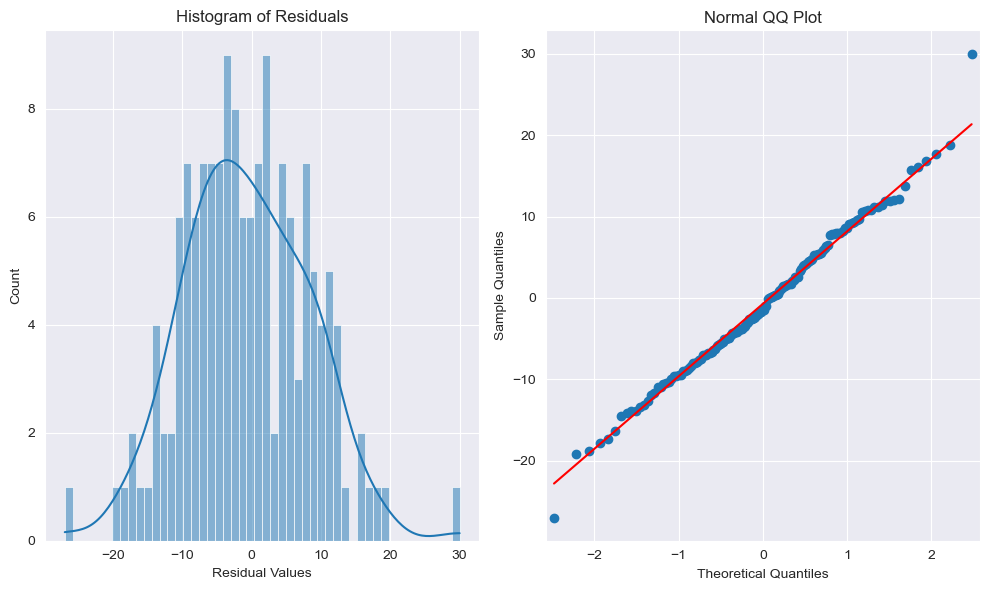

In [163]:
# Our residuals is the dependent variable (y) less the predictor variable (X).
fig, axes = plt.subplots(1, 2, figsize=(10,6))

# Histogram
# Create a histogram of the residuals
sns.histplot(y_test-prediction, kde= True, bins= 50, ax = axes[0])

# Set the title
axes[0].set_title('Histogram of Residuals')

# Set the x label
axes[0].set_xlabel('Residual Values')

# QQ plot
# Create a QQ Plot
sm.qqplot((y_test-prediction), line = 's', ax = axes[1])

# Set the title
axes[1].set_title('Normal QQ Plot')

# Layout
plt.tight_layout()

# Display plot
plt.show()

From the plots above, the histogram shows a normal distribution of the residuals and the data points of QQ plot for a close shape along the red line. These findings suggest our data did not violate the normality assumption.

In [164]:
dict = {'Avg. Session Length': 'Average_Session_Length',
        'Time on App': 'Time_on_App',
       'Time on Website': 'Time_on_Website',
        'Length of Membership': 'Length_of_Membership',
       'Yearly Amount Spent': 'Yearly_Amount_Spent'}

X2 = customers.drop(labels = ['Email', 'Address', 'Avatar'], axis = 1).copy()
X2.rename(columns = dict, inplace = True)

In [165]:
# Create the OLS (ordinary least squares) model
model = ols('Yearly_Amount_Spent ~ Average_Session_Length + Time_on_App + Time_on_Website + Length_of_Membership', 
               data= X2).fit()

# Display model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly_Amount_Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     7766.
Date:                 Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                         20:56:48   Log-Likelihood:                -1856.9
No. Observations:                  500   AIC:                             3724.
Df Residuals:                      495   BIC:                             3745.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1051.5943     22.993    -45.736      0.000   -1096.769   -1006.419
Average_Session_Length    25.7343      0.451     57.057      0.000      24.848      26.620
Time_on_App               38.7092      0.451     85.828      0.000      37.823      39.595
Time_on_Website            0.4367      0.444      0.983      0.326      -0.436       1.309
Length_of_Membership      61.5773      0.448    137.346      0.000      60.696      62.458
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.198
Skew:                          -0.026   Prob(JB):                        0.906
Kurtosis:                       3.083   Cond. No.                     2.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

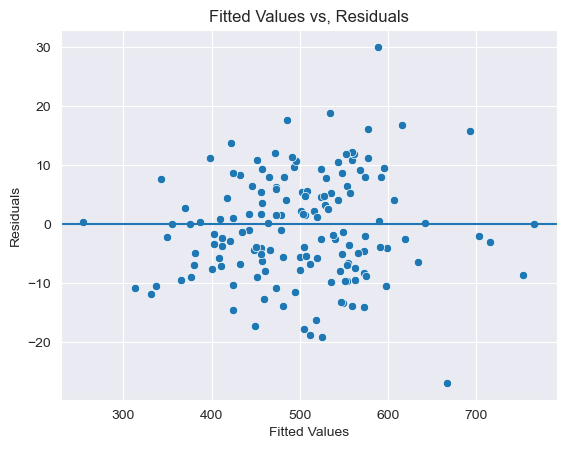

In [166]:
# Create a scatter plot with the fitted values from the model and the residuals.

### YOUR CODE HERE ### 
fig = sns.scatterplot(x= model.fittedvalues, y= y_test-prediction)

fig.set_title('Fitted Values vs, Residuals')

fig.set_xlabel('Fitted Values')

fig.set_ylabel('Residuals')

# Add a line at y = 0 to visualize the variance of residuals above and below 0.
fig.axhline(0)

### YOUR CODE HERE ### 
plt.show()

Based on the above plot, the variance seems constant with the fitted values distribution, meeting the constant variance assumption. Likewise, as seen in the earlier pairplot, our independet (predictor) variable seem to have not correlation with one another, not violating the no multicolinearity assumption.

With our assumptions met, we will now take a final look at our coefficients based on the OLS model to evaluate our model and extract a conclusion.

In [167]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly_Amount_Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     7766.
Date:                 Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                         20:56:52   Log-Likelihood:                -1856.9
No. Observations:                  500   AIC:                             3724.
Df Residuals:                      495   BIC:                             3745.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1051.5943     22.993    -45.736      0.000   -1096.769   -1006.419
Average_Session_Length    25.7343      0.451     57.057      0.000      24.848      26.620
Time_on_App               38.7092      0.451     85.828      0.000      37.823      39.595
Time_on_Website            0.4367      0.444      0.983      0.326      -0.436       1.309
Length_of_Membership      61.5773      0.448    137.346      0.000      60.696      62.458
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.198
Skew:                          -0.026   Prob(JB):                        0.906
Kurtosis:                       3.083   Cond. No.                     2.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Conclusion

Now, based on the orginal question on whether the company should focus on their mobile app or website development to generate revenue, the folloowing can be suggested:

While holding all other independent variables as true, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.73** total dollars spent.

While holding all other independent variables as true, a 1 unit increase in **Time on App** is associated with an **increase of 38.71** total dollars spent.

While holding all other independent variables as true, a 1 unit increase in **Time on Website** is associated with an **increase of 0.43** total dollars spent.

While holding all independent variables as true, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.57** total dollars spent.

From the model, the company can either develop the website more so that it has the same performance as the mobile app, or 
develop the mobile app more since it is the area working better. 

Additionally, a look at the **length of membership** could be beneficial if the potential association with the Time on App or Website are there.